In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

from datetime import datetime as dt

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the dataframe with the data in 24032021-covid19-cdc-deathyn-recent-10k.csv
df = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
df.shape

(10000, 12)

In [4]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/22,2021/01/22,NaN,NaN,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021/01/26,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021/02/03,2021/02/05,NaN,2021/02/03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021/02/05,2021/02/05,2021/02/07,2021/02/05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021/01/27,2021/01/27,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [5]:
df.tail()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2021/01/20,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
9996,2021/02/01,2021/02/01,NaN,2021/02/01,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,No,Missing,No,Missing
9997,2021/01/29,2021/02/03,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9998,2021/01/28,2021/01/28,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9999,2021/01/24,2021/02/03,NaN,2021/01/24,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [6]:
df.dtypes


cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [7]:
categorical_columns = df[['current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']].columns

for column in categorical_columns:
    df[column] = df[column].astype('category')

In [8]:
continuous_columns = df.select_dtypes(['object']).columns

for column in continuous_columns:
    df[column] = pd.to_datetime(df[column])

In [9]:
print(df.dtypes)

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object


In [10]:
continuous_columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'], dtype='object')

In [11]:
categorical_columns

Index(['current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [12]:
# the first method, df.duplicated() assumes keep=First
print('Number of duplicate rows, excluding the first rows, in the table: ', df.duplicated().sum())

# the second method, not df.duplicated(keep=False)
print('Number of duplicaet rows, including the first rows, in the table: ', df.duplicated(keep=False).sum())

Number of duplicate rows, excluding the first rows, in the table:  1681
Number of duplicaet rows, including the first rows, in the table:  2749


In [13]:
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
6,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Missing,No,Missing
8,2021-01-23,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
12,2021-01-22,2021-02-04,2021-01-22,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing
16,2021-01-23,2021-01-23,NaT,2021-01-23,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
17,2021-01-21,2021-01-21,NaT,NaT,Probable Case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
21,2021-01-28,2021-01-28,NaT,2021-01-28,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
23,2021-01-28,2021-01-28,2021-01-28,NaT,Probable Case,Female,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown
24,2021-01-20,2021-01-20,2021-01-20,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Hispanic/Latino,Unknown,Unknown,No,Unknown
27,2021-01-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Missing,No,Missing


In [14]:
df[df.duplicated()]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
153,2021-01-29,2021-01-29,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
257,2021-01-21,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
310,2021-02-13,2021-02-16,NaT,2021-02-13,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
330,2021-01-19,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
398,2021-01-29,2021-01-29,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
427,2021-01-19,NaT,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
431,2021-01-19,2021-01-19,NaT,2021-01-19,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
433,2021-02-04,2021-02-06,NaT,2021-02-04,Laboratory-confirmed case,Male,30 - 39 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing
468,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
482,2021-01-25,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing


In [15]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,8906
sex,10000,5,Female,5127
age_group,10000,10,20 - 29 Years,1730
race_ethnicity_combined,10000,9,Unknown,4128
hosp_yn,10000,4,No,4659
icu_yn,10000,4,Missing,8067
death_yn,10000,2,No,9879
medcond_yn,10000,4,Missing,7942


In [16]:
df.select_dtypes(include=['datetime64']).describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13
cdc_report_dt,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27
pos_spec_dt,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23
onset_dt,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27


In [17]:
dfNaN = df.copy(deep=True)

In [18]:
dfNaN.replace('Missing', np.nan, inplace=True)

In [19]:
dfNaN.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2165
pos_spec_dt                7445
onset_dt                   5838
current_status                0
sex                          11
age_group                    13
race_ethnicity_combined      67
hosp_yn                    2760
icu_yn                     8067
death_yn                      0
medcond_yn                 7942
dtype: int64

In [20]:
miss_perc = {}
for column in df:
    temp = round(((dfNaN[column].isnull().sum() / (dfNaN.shape[0]))*100),2)
    miss_perc[column] = temp

print(miss_perc)

{'cdc_case_earliest_dt': 0.0, 'cdc_report_dt': 21.65, 'pos_spec_dt': 74.45, 'onset_dt': 58.38, 'current_status': 0.0, 'sex': 0.11, 'age_group': 0.13, 'race_ethnicity_combined': 0.67, 'hosp_yn': 27.6, 'icu_yn': 80.67, 'death_yn': 0.0, 'medcond_yn': 79.42}


In [21]:
# .value_counts() counts number of times a unique entry is entered
df['current_status'].value_counts()

Laboratory-confirmed case    8906
Probable Case                1094
Name: current_status, dtype: int64

In [22]:
df['sex'].value_counts()

Female     5127
Male       4788
Unknown      73
Missing      11
Other         1
Name: sex, dtype: int64

In [23]:
df['age_group'].value_counts()

20 - 29 Years    1730
30 - 39 Years    1635
50 - 59 Years    1397
40 - 49 Years    1396
10 - 19 Years    1290
60 - 69 Years    1026
0 - 9 Years       592
70 - 79 Years     550
80+ Years         371
Missing            13
Name: age_group, dtype: int64

In [24]:
df['race_ethnicity_combined'].value_counts()

Unknown                                                 4128
White, Non-Hispanic                                     3397
Black, Non-Hispanic                                      731
Multiple/Other, Non-Hispanic                             655
Hispanic/Latino                                          593
Asian, Non-Hispanic                                      328
American Indian/Alaska Native, Non-Hispanic               69
Missing                                                   67
Native Hawaiian/Other Pacific Islander, Non-Hispanic      32
Name: race_ethnicity_combined, dtype: int64

In [25]:
df['hosp_yn'].value_counts()

No         4659
Missing    2760
Unknown    2187
Yes         394
Name: hosp_yn, dtype: int64

In [26]:
df['death_yn'].value_counts()

No     9879
Yes     121
Name: death_yn, dtype: int64

In [27]:
df['icu_yn'].value_counts()

Missing    8067
Unknown    1391
No          521
Yes          21
Name: icu_yn, dtype: int64

In [28]:
df['medcond_yn'].value_counts()

Missing    7942
Unknown    1025
No          598
Yes         435
Name: medcond_yn, dtype: int64

In [29]:
# Check how many rows contain a missing value
row_inc_nan = df.apply(lambda x: x.isnull().any(), axis=1)
num_rows_nan = len(row_inc_nan[row_inc_nan == True].index)
print('Number of Rows in dataframe which contain NaN in any column:', num_rows_nan)

# Deduct previous answer from the size of the dataframe to determine how many rows are 
# completely full
num_rows_not_nan = (df.shape[0]) - num_rows_nan
print('Number of Rows in dataframe which do not contain NaN in any column:', num_rows_not_nan)

# get the percentage miss for the rows
nan_perc = round(((num_rows_nan / (df.shape[0]))*100),2)
print('Percentage of rows missing information: '+ str(nan_perc)+'%')

Number of Rows in dataframe which contain NaN in any column: 8896
Number of Rows in dataframe which do not contain NaN in any column: 1104
Percentage of rows missing information: 88.96%


## Descriptive Statistics: Continuous Features

In [30]:
# Calculate the range of the continuous features and show the number of times
# each entry is entered

for column in continuous_columns:
    print(column)
    print("-------------\n")
    print("Range {} is: ".format(column), (df[column].max() - df[column].min()))
    print("-------------")
    print(df[column].value_counts(), "\n\n\n")

cdc_case_earliest_dt
-------------

Range cdc_case_earliest_dt is:  25 days 00:00:00
-------------
2021-01-20    620
2021-01-29    610
2021-01-19    584
2021-01-21    564
2021-01-25    555
2021-01-22    534
2021-01-26    492
2021-01-28    469
2021-01-27    439
2021-02-01    427
2021-02-03    386
2021-01-23    380
2021-02-02    359
2021-01-30    341
2021-01-24    321
2021-02-04    319
2021-02-08    319
2021-02-05    309
2021-02-10    298
2021-02-11    287
2021-01-31    281
2021-02-09    269
2021-02-12    242
2021-02-06    223
2021-02-07    190
2021-02-13    182
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
-------------

Range cdc_report_dt is:  225 days 00:00:00
-------------
2021-02-04    516
2021-01-29    492
2021-02-03    391
2021-01-28    332
2021-01-26    323
2021-01-27    321
2021-01-25    309
2021-02-06    306
2021-02-01    286
2021-01-30    285
2021-01-22    267
2021-01-21    264
2021-02-08    262
2021-02-09    262
2021-02-10    262
2021-02-02    257
2021-02-11    

In [31]:
#get the cardinality for the continuous features
features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}   {1}'.format("Feature", "Cardinality"))
print('{0:35}   {1}'.format("-------", "-----------"))

for c in features_cardinality:
    print('{0:35}   {1}'.format(c, str(len(df[c].unique()))))

Feature                               Cardinality
-------                               -----------
cdc_case_earliest_dt                  26
cdc_report_dt                         48
pos_spec_dt                           42
onset_dt                              32


## Check Logical Integrity of Data

In [32]:
# cdc_report_dt is earlier than cdc_case_earliest_dt
test_1a = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['cdc_case_earliest_dt']]
print("Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt:", test_1a.shape[0])

# onset is earlier than cdc_case_earliest_dt
test_1d = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['onset_dt']<df['cdc_case_earliest_dt']]
print("Number of rows onset is earlier than cdc_case_earliest_dt:", test_1d.shape[0])

# pos_spec_dt is earlier than cdc_case_earliest_dt
test_1i = df[['pos_spec_dt', 'cdc_case_earliest_dt']][df['pos_spec_dt']<df['cdc_case_earliest_dt']]
print("Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt:", test_1i.shape[0])

# pos_spec_dt is earlier than onset_dt
test_1h = df[['pos_spec_dt', 'onset_dt']][df['pos_spec_dt']<df['onset_dt']]
print("Number of rows pos_spec_dt is earlier than onset_dt:", test_1h.shape[0])

# cdc_report_dt is later than onset_dt
test_1f = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']>df['onset_dt']]
print("Number of rows cdc_report_dt is later than onset_dt:", test_1f.shape[0])

# cdc_report_dt is earlier than onset_dt
test_1g = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['onset_dt']]
print("Number of rows cdc_report_dt is earlier than onset_dt:", test_1g.shape[0])

Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt: 25
Number of rows onset is earlier than cdc_case_earliest_dt: 0
Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt: 34
Number of rows pos_spec_dt is earlier than onset_dt: 34
Number of rows cdc_report_dt is later than onset_dt: 2277
Number of rows cdc_report_dt is earlier than onset_dt: 38


In [33]:
# Return a list of indexs where icu is yes
hosp_unk_icuy = df.apply(lambda x: True if (x['icu_yn'] == 'Yes') else False, axis=1)
hosp_unk_icuy = hosp_unk_icuy.index[hosp_unk_icuy]

hosp_unk_icuy_df = df[['hosp_yn','icu_yn']].iloc[hosp_unk_icuy]   

In [34]:
# compare icu yes with hosp unknown
hosp_unk_icuy_df[['hosp_yn']].value_counts()

hosp_yn
Yes        21
Missing     0
No          0
Unknown     0
dtype: int64

In [35]:
# Return a list of indexs where hosp is No
hospn_icuu = df.apply(lambda x: True if (x['hosp_yn'] == 'No') else False, axis=1)
hospn_icuu = hospn_icuu.index[hospn_icuu]

hospn_icuu_df = df[['hosp_yn','icu_yn']].iloc[hospn_icuu]  

In [36]:
# compare hosp no and icu unknown
hospn_icuu_df[['icu_yn']].value_counts()

icu_yn 
Missing    3729
Unknown     501
No          429
Yes           0
dtype: int64

## Prepare a table with descriptive statistics for all continuous and categorical features

In [37]:
# Select the continuous features and use describe() to create the statistics for the features
df.select_dtypes(include=['datetime64']).describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13
cdc_report_dt,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27
pos_spec_dt,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23
onset_dt,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27


In [38]:
# Use the .describe() method to create a statistics table for the categorical features
df[categorical_columns].describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,8906
sex,10000,5,Female,5127
age_group,10000,10,20 - 29 Years,1730
race_ethnicity_combined,10000,9,Unknown,4128
hosp_yn,10000,4,No,4659
icu_yn,10000,4,Missing,8067
death_yn,10000,2,No,9879
medcond_yn,10000,4,Missing,7942


#### Plot histograms summary sheet for all the continuous features

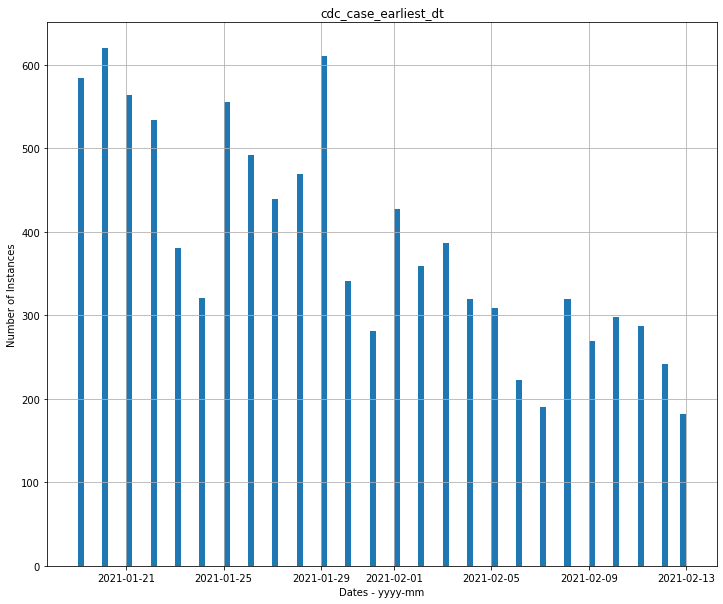

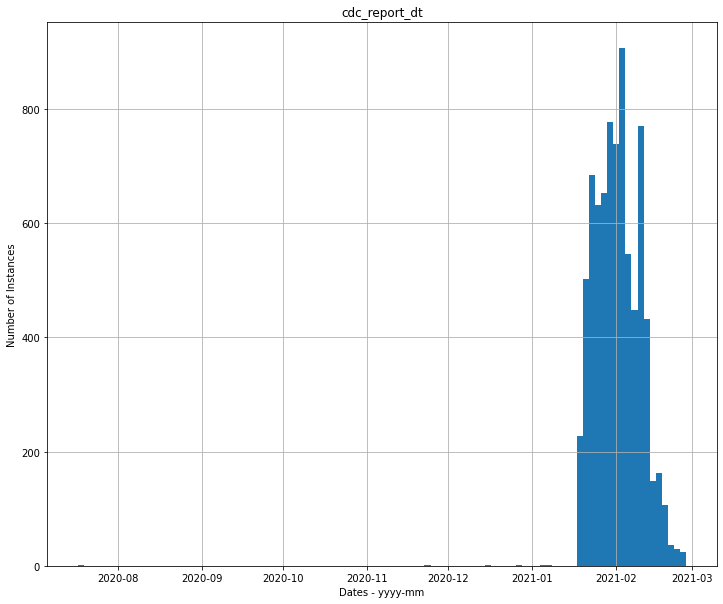

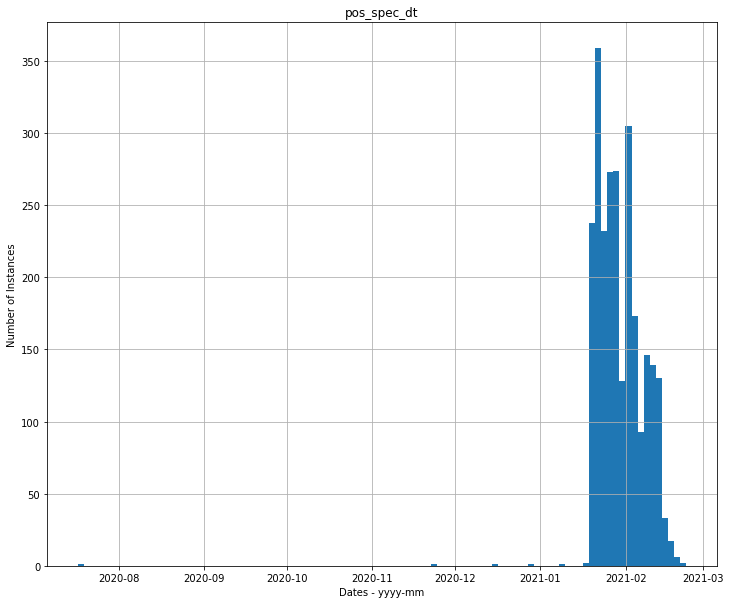

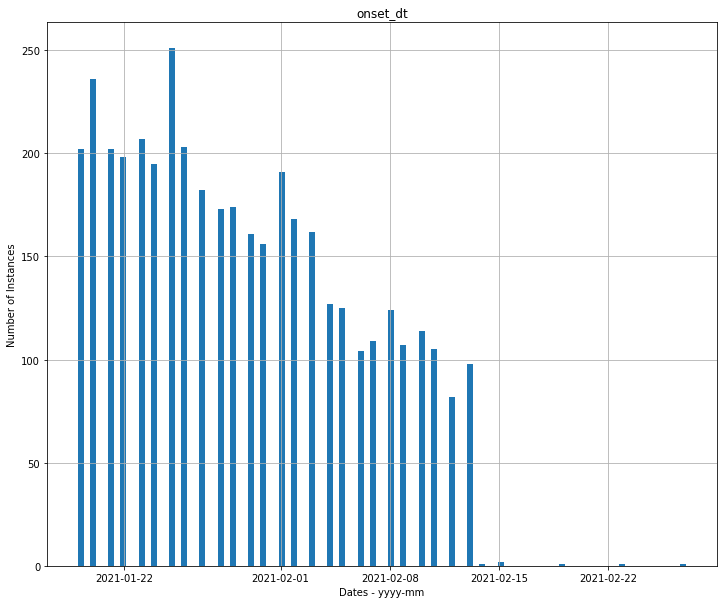

In [39]:
# create larger versions of the histograms
pp = PdfPages('20205264_continuouse_features_histograms.pdf')
for columns in continuous_columns:
    fig = df[continuous_columns].hist(column=columns, figsize=(12,10), bins=100)
    plt.title(columns)
    plt.ylabel('Number of Instances')
    plt.xlabel('Dates - yyyy-mm')
    pp.savefig()
    plt.show
pp.close()

<class 'matplotlib.axes._subplots.AxesSubplot'>


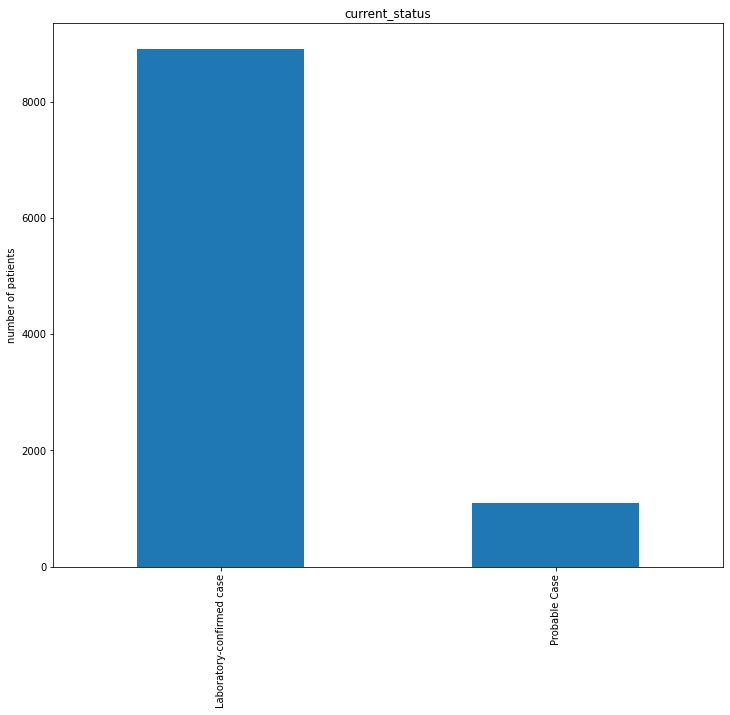

<class 'matplotlib.axes._subplots.AxesSubplot'>


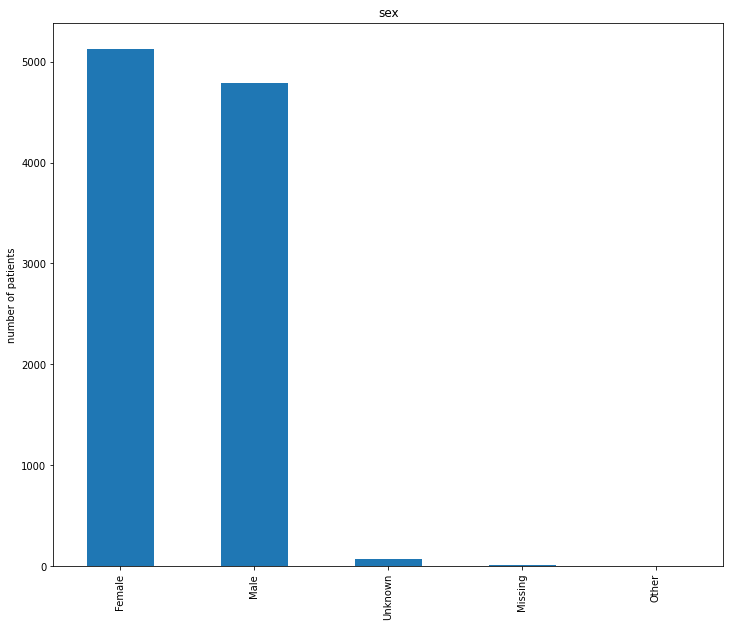

<class 'matplotlib.axes._subplots.AxesSubplot'>


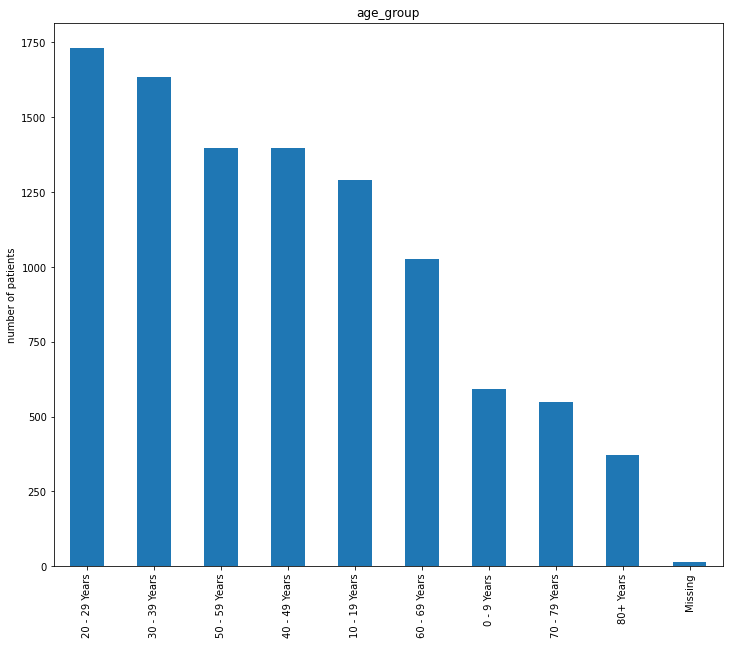

<class 'matplotlib.axes._subplots.AxesSubplot'>


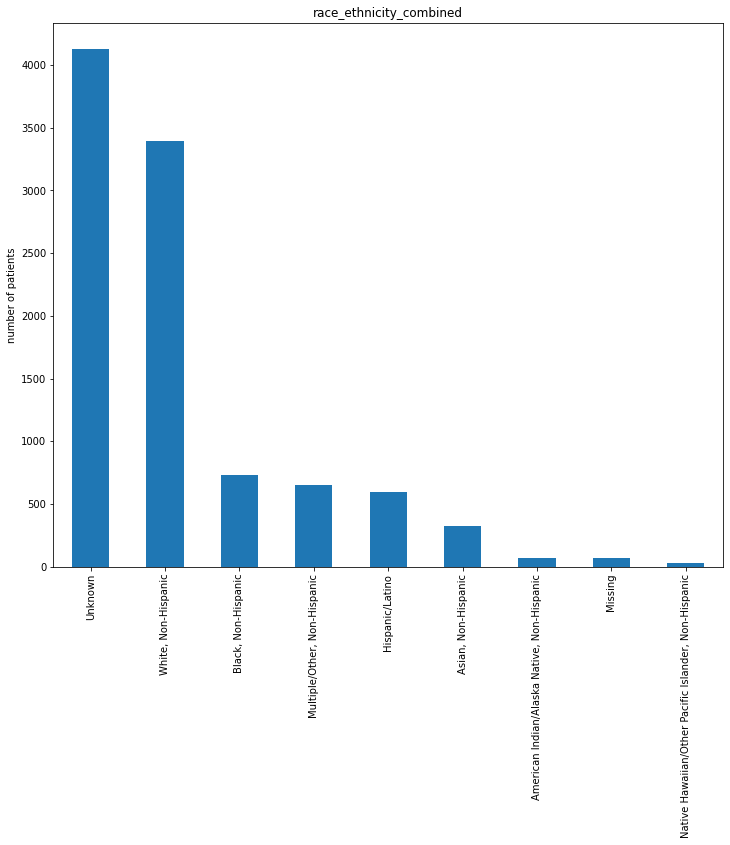

<class 'matplotlib.axes._subplots.AxesSubplot'>


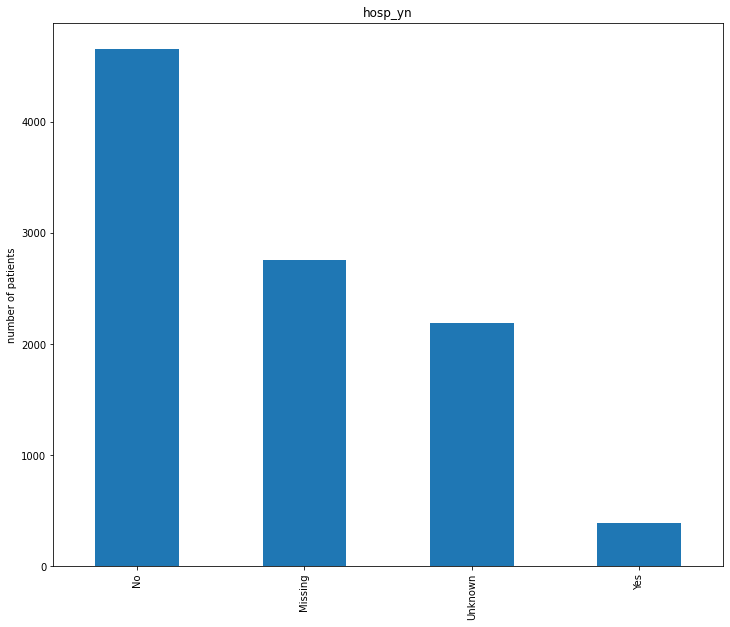

<class 'matplotlib.axes._subplots.AxesSubplot'>


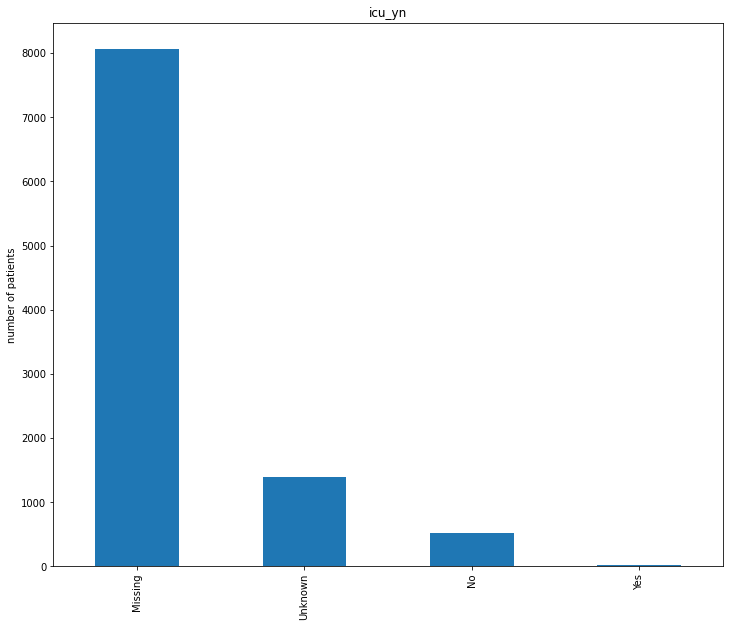

<class 'matplotlib.axes._subplots.AxesSubplot'>


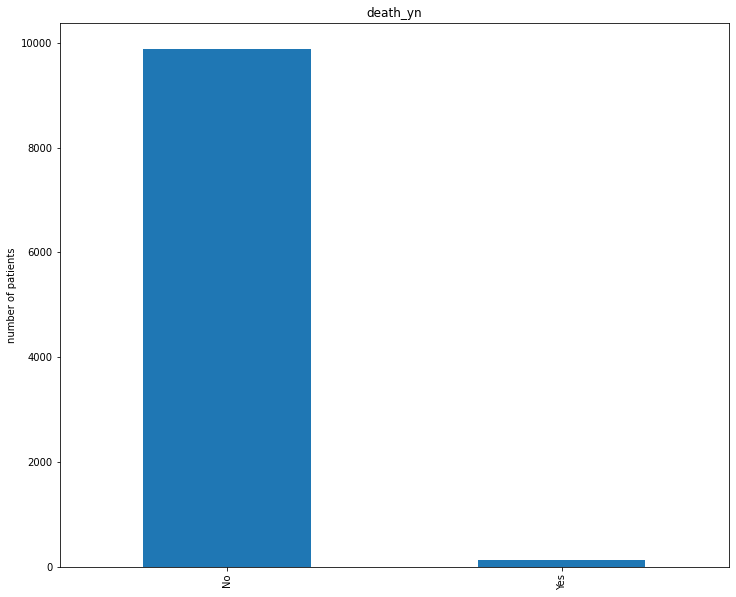

<class 'matplotlib.axes._subplots.AxesSubplot'>


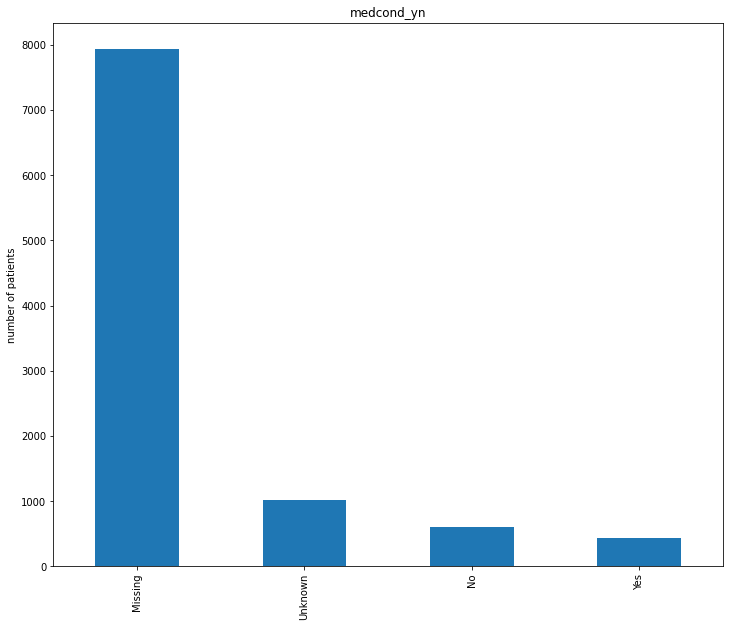

In [40]:
pp = PdfPages('20205264_categorical_features_barplots.pdf')
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    print(type(f))
    plt.title(col)
    plt.ylabel('number of patients')
    pp.savefig(f.get_figure())
    plt.show()
pp.close()

# 2. Data Understanding: Data Quality Plan for the cleaned CSV file

# removing columns

Feature        |	Feature Type       |	Data Quality Issue      |   Handling Strategy

**cdc_case_earliest_dt**  
datetime64[ns]  
Some dates later than cdc_report_dt dates (20 rows). Some dates later than pos_spec_dt (80 rows).  
Examine rows for general integrity and adjust cdc_case_earliest_dt if needed (eg when cdc_case_earliest_dt > cdc_report_dt). Use information from integrity tests to do imputation on cdc_case_earliest_dt where values are wrong. 

**cdc_report_dt**  
datetime64[ns]  
Missing values (20%).  
Use for comparison in integrity checks and then drop as depreciated according to CDC guidelines.  

**pos_spec_dt**  
datetime64[ns]  
Missing values (70%).  
Drop after checking against other columns for logical integrity and whether any useful information can be extracted.  

**onset_dt**  
datetime64[ns]  
Some dates later than pos_spec_dt (75 rows).  
Missing values (45%).	Examine rows for general integrity (eg when compared to pos_spec_dt); if onset_dt > pos_spec_dt, assume to be close contact or health worker presenting symptoms only after testing positive, or asymptomatic. Check how it is related to the target class. 
If not useful re target class, drop it, otherwise consider creating an indicator feature first (eg derive a missing value indicator), and then drop it.  

**current_status**  
category  
None  
Do nothing.  

**sex**  
category  
Missing(0.1%) and unknown (0.5%) values.  
Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted (eg how it is related to the target class.).  

**age_group**  
category  
Missing values (0.1%).  
Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted.  

**race_ethnicity_combined**  
category  
Missing (0.8%) and Unknown (40.2%) values  
Combine into single Unknown value and keep.  

**hosp_yn**  
category  
Missing (21%) and Unknown(15.2%) values  
Combine into single Unknown value and keep.  

**icu_yn**  
category  
Missing(76.45%) and Unknown (13.33%) values  
Infer values from hosp_yn where possible, combine into single Unknown value and keep.  

**medcond_yn**  
category  
Missing (74.99%) and Unknown (7.78%) values  
Combine into single Unknown value and keep.  

**death_yn**  
category  
None  
Do nothing. Note: imbalanced classes (97% No and 3% Yes).  

All null values in all features should be addressed, either through imputation (where it makes sense), dropping (if only few rows), or replacing missing data with Unknown value.

In [41]:
#Create a list of indices where the values are true
test_1a_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['cdc_report_dt']) else False, axis=1)
test_1a_true_index = test_1a_index[test_1a_index == True].index
print("Number of rows effected: ", len(test_1a_true_index))
print("\n", test_1a_true_index)

Number of rows effected:  25

 Int64Index([ 136,  137, 2387, 2521, 2856, 2920, 3289, 4936, 5130, 5900, 5961,
            6334, 6499, 6923, 7064, 7103, 7205, 7288, 7357, 7370, 7705, 7714,
            7895, 8483, 9422],
           dtype='int64')


In [42]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['cdc_report_dt'], df['cdc_report_dt'], df['cdc_case_earliest_dt'])


In [43]:
#Create a list of indices where the values are true
test_1a_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['cdc_report_dt']) else False, axis=1)
test_1a_true_index = test_1a_index[test_1a_index == True].index
print("Number of rows effected: ", len(test_1a_true_index))
print("\n", test_1a_true_index)

Number of rows effected:  0

 Int64Index([], dtype='int64')


In [44]:
#Create a list of indices where the values are true
test_PS_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['pos_spec_dt']) else False, axis=1)
test_PS_true_index = test_PS_index[test_PS_index == True].index
print("Number of rows effected: ", len(test_PS_true_index))
print("\n", test_PS_true_index)

Number of rows effected:  13

 Int64Index([275, 1363, 3419, 5068, 5859, 6027, 6622, 6899, 7036, 7265, 7575,
            7878, 8983],
           dtype='int64')


In [45]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['pos_spec_dt'], df['pos_spec_dt'], df['cdc_case_earliest_dt'])


In [46]:
#Create a list of indices where the values are true
test_OS_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['onset_dt']) else False, axis=1)
test_OS_true_index = test_OS_index[test_OS_index == True].index
print("Number of rows effected: ", len(test_OS_true_index))
print("\n", test_OS_true_index)

Number of rows effected:  0

 Int64Index([], dtype='int64')


In [47]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['onset_dt'], df['onset_dt'], df['cdc_case_earliest_dt'])


In [48]:
# a earlier than b = a < b
# a later than b = a > b

# cdc_report_dt is earlier than cdc_case_earliest_dt
test_1a = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['cdc_case_earliest_dt']]
print("Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt:", test_1a.shape[0])

# onset is earlier than cdc_case_earliest_dt
test_1d = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['onset_dt']<df['cdc_case_earliest_dt']]
print("Number of rows onset is earlier than cdc_case_earliest_dt:", test_1d.shape[0])

# pos_spec_dt is earlier than cdc_case_earliest_dt
test_1i = df[['pos_spec_dt', 'cdc_case_earliest_dt']][df['pos_spec_dt']<df['cdc_case_earliest_dt']]
print("Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt:", test_1i.shape[0])


Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt: 0
Number of rows onset is earlier than cdc_case_earliest_dt: 0
Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt: 0


In [49]:
#Create a list of indices where the values are true
test_OP_index = df.apply(lambda x: True if (x['onset_dt'] > x['pos_spec_dt']) else False, axis=1)
test_OP_true_index = test_OP_index[test_OP_index == True].index
print("Number of rows effected: ", len(test_OP_true_index))
print("\n", test_OP_true_index)

Number of rows effected:  34

 Int64Index([ 136,  275, 1363, 2521, 2856, 2920, 3289, 3419, 5068, 5130, 5859,
            5900, 5961, 6027, 6334, 6499, 6622, 6899, 6923, 7036, 7103, 7205,
            7265, 7288, 7357, 7370, 7575, 7705, 7714, 7878, 7895, 8483, 8983,
            9422],
           dtype='int64')


In [50]:
df['onset_dt'] = np.where(df['onset_dt'] > df['pos_spec_dt'], 1, 0)

In [51]:
df.drop(columns='cdc_report_dt', inplace = True)
df.drop(columns='pos_spec_dt', inplace = True)

continuous_columns = continuous_columns.drop(['pos_spec_dt', 'cdc_report_dt'])
print(continuous_columns)

Index(['cdc_case_earliest_dt', 'onset_dt'], dtype='object')


In [52]:
df.head(5)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-01-22,0,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021-01-26,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021-02-03,0,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021-02-05,0,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,0,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [53]:
#Create a list of indices where the values are true
sex_missing = df.apply(lambda x: True if (x['sex'] == "Missing") else False, axis=1)

sex_missing_true_index=sex_missing[sex_missing == True].index
print("Number of rows effected: ", len(sex_missing_true_index))
print("\n", sex_missing_true_index)

Number of rows effected:  11

 Int64Index([1282, 3117, 3460, 3915, 4093, 4306, 4328, 4399, 5614, 7401, 7837], dtype='int64')


In [54]:
df['sex'].replace('Missing', 'Unknown', inplace=True)

In [55]:
#Create a list of indices where the values are true
age_missing = df.apply(lambda x: True if (x['age_group'] == "Missing") else False, axis=1)

age_missing_true_index=age_missing[age_missing == True].index
print("Number of rows effected: ", len(age_missing_true_index))
print("\n", age_missing_true_index)

Number of rows effected:  13

 Int64Index([912, 960, 1609, 2452, 3281, 4306, 4962, 5004, 5292, 5306, 8001,
            8442, 8926],
           dtype='int64')


In [56]:
#Create a list of indices where the values are true
REC_missing = df.apply(lambda x: True if (x['race_ethnicity_combined'] == "Missing") else False, axis=1)

REC_missing_true_index=REC_missing[REC_missing == True].index
print("Number of rows effected: ", len(REC_missing_true_index))
print("\n", REC_missing_true_index)

Number of rows effected:  67

 Int64Index([  73,  356,  378,  975, 1068, 1962, 1974, 2028, 2050, 2158, 2160,
            2408, 2599, 2896, 3078, 3172, 3357, 3605, 3694, 3746, 3913, 4024,
            4088, 4314, 4328, 4334, 4535, 4790, 5347, 5470, 5555, 5667, 5810,
            5888, 5976, 6073, 6310, 6382, 6480, 6889, 7018, 7019, 7117, 7131,
            7195, 7232, 7282, 7497, 7791, 7816, 7837, 8251, 8379, 8447, 8545,
            8659, 8674, 9007, 9168, 9262, 9474, 9486, 9508, 9576, 9590, 9630,
            9930],
           dtype='int64')


In [57]:
df['race_ethnicity_combined'].replace('Missing', 'Unknown', inplace=True)

In [58]:
#Create a list of indices where the values are true
hosp_missing = df.apply(lambda x: True if (x['hosp_yn'] == "Missing") else False, axis=1)

hosp_missing_true_index=hosp_missing[hosp_missing == True].index
print("Number of rows effected: ", len(hosp_missing_true_index))
print("\n", hosp_missing_true_index)

Number of rows effected:  2760

 Int64Index([   2,    7,   12,   13,   22,   28,   31,   32,   42,   43,
            ...
            9982, 9985, 9988, 9989, 9991, 9992, 9993, 9995, 9997, 9998],
           dtype='int64', length=2760)


In [59]:
df['hosp_yn'].replace('Missing', 'Unknown', inplace=True)

In [60]:
df['hosp_yn'].replace('OTH', 'Unknown', inplace=True)

In [61]:
#Create a list of indices where the values are true
hosp_oth = df.apply(lambda x: True if (x['hosp_yn'] == "OTH") else False, axis=1)

hosp_oth_true_index=hosp_oth[hosp_oth == True].index
print("Number of rows effected: ", len(hosp_oth_true_index))
print("\n", hosp_oth_true_index)

Number of rows effected:  0

 Int64Index([], dtype='int64')


In [62]:
df['icu_yn'].replace('Missing', 'Unknown', inplace=True)

In [63]:
# compare hosp no and icu unknown
hospn_icuu_df['icu_yn'].value_counts()

Missing    3729
Unknown     501
No          429
Yes           0
Name: icu_yn, dtype: int64

In [64]:
for i in hospn_icuu:
    if df.iloc[i , df.columns.get_loc("icu_yn")] == 'Unknown':
        df.iloc[i , df.columns.get_loc("icu_yn")] = 'No'
    else:
        pass

In [65]:
df.head(20)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-01-22,0,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,No,No,Missing
1,2021-01-26,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Missing
2,2021-02-03,0,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Unknown,Unknown,No,Missing
3,2021-02-05,0,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No,No,No
4,2021-01-27,0,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Missing
5,2021-02-07,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
6,2021-01-26,0,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Unknown,No,Missing
7,2021-02-04,0,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Unknown,Unknown,No,Missing
8,2021-01-23,0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Unknown,No,Missing
9,2021-01-25,0,Probable Case,Female,70 - 79 Years,"White, Non-Hispanic",No,No,No,Missing


In [66]:
# compare hosp no and icu unknown
hospn_icuu_df['icu_yn'].value_counts()

Missing    3729
Unknown     501
No          429
Yes           0
Name: icu_yn, dtype: int64

In [67]:
df['medcond_yn'].replace('Missing', 'Unknown', inplace=True)

In [68]:
df['sex'].value_counts()

Female     5127
Male       4788
Unknown      84
Other         1
Name: sex, dtype: int64

In [69]:
df['age_group'].value_counts()

20 - 29 Years    1730
30 - 39 Years    1635
50 - 59 Years    1397
40 - 49 Years    1396
10 - 19 Years    1290
60 - 69 Years    1026
0 - 9 Years       592
70 - 79 Years     550
80+ Years         371
Missing            13
Name: age_group, dtype: int64

In [70]:
#Create a list of indices where the values are true
age_group_missing = df.apply(lambda x: True if (x['age_group'] == "Missing") else False, axis=1)

age_group_missing_true_index = age_group_missing[age_group_missing == True].index
print("Number of rows effected: ", len(age_group_missing_true_index))
print("\n", age_group_missing_true_index) 

Number of rows effected:  13

 Int64Index([912, 960, 1609, 2452, 3281, 4306, 4962, 5004, 5292, 5306, 8001,
            8442, 8926],
           dtype='int64')


In [71]:
df.iloc[age_group_missing_true_index]

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
912,2021-01-20,0,Probable Case,Female,Missing,Unknown,Unknown,Unknown,No,Unknown
960,2021-02-07,0,Probable Case,Female,Missing,Unknown,No,No,No,Unknown
1609,2021-02-03,0,Probable Case,Female,Missing,Unknown,Unknown,Unknown,No,Unknown
2452,2021-02-05,0,Probable Case,Female,Missing,"White, Non-Hispanic",No,No,No,Unknown
3281,2021-02-01,0,Probable Case,Female,Missing,"White, Non-Hispanic",No,No,No,Unknown
4306,2021-01-22,0,Laboratory-confirmed case,Unknown,Missing,Unknown,Unknown,Unknown,No,Unknown
4962,2021-02-03,0,Probable Case,Female,Missing,Unknown,Unknown,Unknown,No,Unknown
5004,2021-01-27,0,Probable Case,Male,Missing,"White, Non-Hispanic",No,No,No,Unknown
5292,2021-01-23,0,Probable Case,Male,Missing,"White, Non-Hispanic",No,No,No,Unknown
5306,2021-01-28,0,Probable Case,Male,Missing,Unknown,Unknown,Unknown,No,Unknown


In [72]:
#Create a list of indices where the values are true
# age_missing = df.apply(lambda x: True if (x['age'] == "Unknown" | ) else False, axis=1)
drop_age_missing = df.apply(lambda x : True if (x['age_group'] == "Missing" and x['race_ethnicity_combined'] == 'Unknown' and x['hosp_yn'] == 'Unknown'and x['icu_yn'] == 'Unknown'and x['medcond_yn'] == 'Unknown') else False, axis=1)

drop_age_missing_true_index = drop_age_missing[drop_age_missing == True].index
print("Number of rows effected: ", len(drop_age_missing_true_index))
print("\n", drop_age_missing_true_index)

Number of rows effected:  6

 Int64Index([912, 1609, 4306, 4962, 5306, 8442], dtype='int64')


# Remove rows at the above indices
df.drop(index = drop_age_missing_true_index, inplace=True) 

In [73]:
#Create a list of indices where the values are true
sex_missing = df.apply(lambda x: True if (x['sex'] == "Unknown") else False, axis=1)

sex_missing_true_index = sex_missing[sex_missing == True].index
print("Number of rows effected: ", len(sex_missing_true_index))
print("\n", sex_missing_true_index) 

Number of rows effected:  84

 Int64Index([ 197,  244,  307,  479,  510, 1001, 1180, 1282, 1459, 1624, 1882,
            1917, 2017, 2179, 2323, 2362, 2465, 2500, 2939, 3077, 3117, 3360,
            3412, 3460, 3512, 3531, 3588, 3915, 4093, 4143, 4151, 4197, 4306,
            4328, 4354, 4366, 4399, 4410, 4469, 4492, 4524, 5187, 5201, 5267,
            5498, 5551, 5571, 5614, 5813, 6090, 6100, 6367, 6508, 6515, 6609,
            6671, 7251, 7253, 7401, 7469, 7528, 7837, 7844, 7892, 7914, 8101,
            8284, 8580, 8787, 8817, 8958, 8961, 9027, 9054, 9231, 9238, 9372,
            9484, 9752, 9868, 9902, 9923, 9936, 9990],
           dtype='int64')


In [74]:
df.iloc[sex_missing_true_index]

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
197,2021-02-02,0,Laboratory-confirmed case,Unknown,40 - 49 Years,Unknown,Unknown,Unknown,No,Unknown
244,2021-01-25,0,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
307,2021-01-19,0,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
479,2021-02-06,0,Laboratory-confirmed case,Unknown,60 - 69 Years,"White, Non-Hispanic",No,No,No,Unknown
510,2021-01-26,0,Laboratory-confirmed case,Unknown,0 - 9 Years,"Black, Non-Hispanic",No,No,No,Unknown
1001,2021-02-05,0,Laboratory-confirmed case,Unknown,70 - 79 Years,"Multiple/Other, Non-Hispanic",Yes,Unknown,No,Unknown
1180,2021-01-28,0,Laboratory-confirmed case,Unknown,60 - 69 Years,Unknown,Unknown,Unknown,No,Unknown
1282,2021-02-06,0,Laboratory-confirmed case,Unknown,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown
1459,2021-01-31,0,Laboratory-confirmed case,Unknown,50 - 59 Years,Unknown,Unknown,Unknown,No,Unknown
1624,2021-02-05,0,Probable Case,Unknown,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown


In [75]:
#Create a list of indices where the values are true
# sex_missing = df.apply(lambda x: True if (x['sex'] == "Unknown" | ) else False, axis=1)
drop_sex_missing = df.apply(lambda x : True if (x['sex'] == "Unknown" and x['race_ethnicity_combined'] == 'Unknown' and x['hosp_yn'] == 'Unknown'and x['icu_yn'] == 'Unknown'and x['medcond_yn'] == 'Unknown') else False, axis=1)

drop_sex_missing_true_index = drop_sex_missing[drop_sex_missing == True].index
print("Number of rows effected: ", len(drop_sex_missing_true_index))
print("\n", drop_sex_missing_true_index)

Number of rows effected:  46

 Int64Index([ 197,  244,  307, 1180, 1282, 1459, 1624, 1882, 2323, 2362, 2465,
            2939, 3117, 3412, 3460, 3588, 3915, 4197, 4306, 4399, 4492, 5187,
            5201, 5267, 5498, 5551, 5571, 5614, 5813, 6090, 6508, 7251, 7253,
            7528, 7844, 7892, 7914, 8580, 8787, 8958, 9054, 9484, 9752, 9923,
            9936, 9990],
           dtype='int64')


# Remove rows at the above indices
df.drop(index = drop_sex_missing_true_index, inplace=True) 

In [76]:
df['age_group'].replace('Missing', 'Unknown', inplace=True)

In [77]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
onset_dt                            int64
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [78]:
df['onset_dt'] = df['onset_dt'].astype('category')

In [79]:
categorical_columns = df[['onset_dt', 'current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']].columns

In [80]:
continuous_columns = continuous_columns.drop('onset_dt')
print(continuous_columns)

Index(['cdc_case_earliest_dt'], dtype='object')


In [81]:
dfNaN2 = df.copy(deep=True)

In [82]:
dfNaN2.replace('Missing', np.nan, inplace=True)

In [83]:
dfNaN2.isnull().sum()

cdc_case_earliest_dt       0
onset_dt                   0
current_status             0
sex                        0
age_group                  0
race_ethnicity_combined    0
hosp_yn                    0
icu_yn                     0
death_yn                   0
medcond_yn                 0
dtype: int64

In [84]:
dates_series = df['cdc_case_earliest_dt']
dates_series = dates_series.fillna('Missing')
counts_dict = dates_series.to_dict()
# error checking print(counts_dict)
dates_list = []
for i in counts_dict:
    dates_list.append(counts_dict[i])
# error checking print('counts_list', len(counts_list))

dates = []
for i in dates_list:
    dates.append(i.strftime("%Y%m%d"))

print('dates_list', len(dates_list) )
print('type', type(dates[1]))
# error checking print(dates)

dates_list 10000
type <class 'str'>


In [85]:
months = []
monthsDict = {1:'January', 2:'February', 3:'March', 4:'Arpil', 5:'May', 6: 'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
for i in dates_list:
#     temp = monthsDict[i.month]
    months.append(i.month)
    

In [86]:
print(months, len(months))

[1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 

In [87]:
df['cdc_case_earliest_mt'] = months

In [88]:
years = []
for i in dates_list:
    years.append(i.year)
    
df['cdc_case_earliest_yr'] = years

In [89]:
df.head()

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_mt,cdc_case_earliest_yr
0,2021-01-22,0,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,No,No,Unknown,1,2021
1,2021-01-26,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown,1,2021
2,2021-02-03,0,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Unknown,Unknown,No,Unknown,2,2021
3,2021-02-05,0,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No,No,No,2,2021
4,2021-01-27,0,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Unknown,1,2021


In [90]:
# Export cleaned dataframe to csv file
df.to_csv('20205264_Cleaned_new_dataset_using_data_quality_plan.csv', index=False)